In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [3]:
# %load https://gist.githubusercontent.com/fontclos/a398c95d2841dfb19e864d08c1f60201/raw/fd3d86c9836be250ed34be6ec87c9c7dc43b9d4a/matplotlib_defaults.py
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# The Metropolis algorithm
We will build a simple implementation of the **Metropolis** algorithm for the 2D Ising model. As a reminder, a single update of the Metropolis algorithm works as follows:

1. Pick a site $(i, j)$ at random.
2. Calculate the energy change $\Delta E$ that flipping the spin $s_{ij}$ would produce.
3. If $\Delta E <0$, flip the spin with probability $1$.
4. If $\Delta E >0$, flip the spin with probability $e^{-\beta \Delta E}$.

In [4]:
"""Ho J=1 e H=0"""

'Ho J=1 e H=0'

### Exercice
Write a function that, given an integer $N$, returns an $N \times N$ array whose elements are randomly picked from {-1, 1}. 

In [4]:
def create_initial_config(N=None):
    """
    Create the starting initial configuration.
    
    All elements are [-1, 1] with 50% prob.
    The lattice is a square of size N.
    
    Parameters
    ----------
    N : int
        The system size.

    Returns
    -------
    config : np.array, (N, N)
        A random {-1, 1} array of size (N, N).
    """
    config = np.random.choice([-1,1], size=(N ,N))#reticolo NxN che contiene 1 e -1
    
    return config

Let us create an initail configuration with our `create_inital_config_function`. A system size of $N=100$ will be enough.

In [5]:
config = create_initial_config(N=100)

To plot our system we can use `plt.imshow()`, as follows:

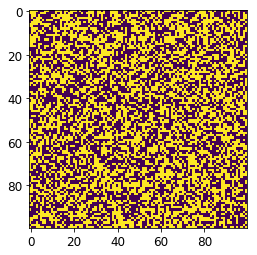

In [6]:
plt.imshow(config);

### Exercise 
We will write our Metropolis update function. Given a site $(i, j)$, what is the change in energy $\Delta E$ that flipping $S(i, j)$ entails?
Recall that only 4 spins are connected to $(i, j)$, so you don't need to compute the energy of the whole system.

The change in energy is equal to:
$\Delta E$ = 2 $J$ $m_i$ , where $m_i$ = $\sum_{k=1}^{4} s_k$   it's the sum of the 4 spins connected to $S(i, j)$


### Exercise
Write a function called `metropolis_single_update()`.  
The **input** should be:

+ *config*, a lattice configuration as an (N, N) array.
+ *T*, the temperatue.

There is no need to return anything since in python, functions can modify its input, so we will be updating config *inplace*. But it is useful to return the energy change $\Delta E$ if one later wants to track the energy during simulations. To simplify things, you can use **periodic boundary conditions** (in python, the modulo operator is `%`).

In [7]:
def metropolis_single_update(config=None, T=None):
    '''
    Do a single Monte Carlo update using Metropolis algorithm.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The current configuration.
    T : float
        The temperature.

    '''
    J = 1
    
    # make sure config is square
    N, M = config.shape
    assert np.sqrt(N*M) == N
    
    # choose random site
    i = np.random.randint(N)
    j = np.random.randint(N)
    s =  config[i, j]#sito centrale
        
    # compute energy cost of flip
    # DeltaE is the possible energy cost
    # effDeltaE is the real energy cost (depending on whether we did the flip or not)
    
    #Devo imporre le condizioni al contorno e calcolare la magnetizzazione 
    
    m = config[(i+1)%N, j] +\
        config[i, (j+1)%N] +\
        config[(i-1)%N, j] +\
        config[i, (j-1)%N]

    DeltaE = 2*s*m    
    effDeltaE = 0
    
    #valuto l'esponenziale 
    k = 1/T
    e = np.exp((-1)*k*DeltaE)
    x = np.random.uniform()

    # case DeltaE < 0, flip the spin with prob 1 
    if DeltaE < 0:
        # flip the sping
        s *= -1
        # set effective DeltaE to DeltaE 
        effDeltaE = DeltaE
        
    # case DeltaE >= 0
    elif x < e:
        # flip the spin with certain probability
        
        #valuto l'esponenziale, genero un numero casuale uniformemente distribuito tra 0 e 1 
        #se il numero generato è minore del valore dell'esponenziale allora flippo gli spin
    
        # flip the spin
        s *= -1
        # set effective Delta E 
        effDeltaE = DeltaE
        
    # update configuration
    # notice there is no need to return the whole configuration, the function
    # will modify config _in_place_
    config[i, j] = s
    
    # but it is clever to return the effective DeltaE, since we have already computed it
    # notice that if we didn't flip the spin, the change in energy is 0
    return effDeltaE

## Visualizing the simulation on real time
To see if our Metropolis algorithm works, you might want to simulate systems at different temperatures, and observe how the configuration evolves trought time. To do this you need the `display` module. Below you will find an example of how to use it.

For the 2D Ising model, the **critical temperature** is known to be
$$
T_c = \frac{2}{\ln(1+\sqrt{2})} \simeq 2.2691853...
$$
Try executing the cell below at different values of the temperature, for different system size. 

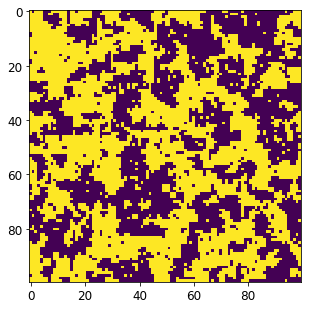

In [8]:
T_c = 2/np.log(1+np.sqrt(2))

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Exercice
Write a function that computes the energy of a configuration, and another that tracks its evolution over time.

In [9]:
def get_energy(config):
    """
    Compute the energy of a configuration.
    
    The energy is defined as $E = -\sum_{(a, b)} S_a S_b$,    
    where the sum runs over pairs of adjacent spins.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The system configuration.
        
        
    Returns
    -------
    E : float
        The energy of the configuration.
    """
    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i0, j0, i1, j1) represents two adjacent sites located
    # at (0, j0) and (i1, j1)
    horizontal_edges = [
        (i , j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1]*config[i2, j2]
    
    return E

In [10]:
def get_energy_evolution(N=20, T=T_c, n_updates=50000):
    """
    Compute the energy evolution of a 2D Ising instance.
    
    Parameters
    ----------
    N : int
        The system size.
    T : float
        The temperature.
    n_updates : int
        Number of Metropolis updates.
        
    Returns
    -------
    Es : np.array, (n_updates, )
    """
    config= create_initial_config(N=N)
    E = [get_energy(config)]
    
    for y in range(n_updates):
        E.append(metropolis_single_update(config, T=T_c))
    
    Es = np.cumsum(E)
    
    return Es

### Exercise
Compute the energy of your system during a long simulation, and plot it as a function of time.
Can you distinguish two qualitatively different periods? What do they correspond to?

In [11]:
S = [10, 40, 100, 150]
energy_evolution = {}

for x in S:
    energy_evolution[x] = get_energy_evolution(N=x, n_updates = 50000)

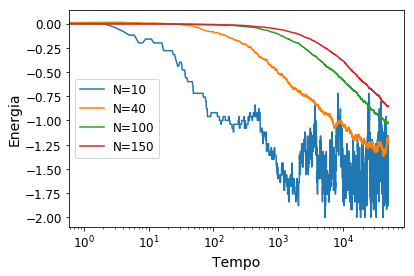

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for M, E in energy_evolution.items():
    ax.semilogx(E/M**2, label="N=%d"%M)

ax.set_xlabel("Tempo")
ax.set_ylabel("Energia")
ax.legend(loc=6)

L'energia con l'aumentare del tempo tende al minimo, per sistemi con dimensione (N) piccola si ha una fluttuazione maggiore intorno al minimo, ma mano che aumento la dimensione le fluttuazioni diminuiscono.

# Efficient Metropolis
Our implementation of the Ising model was not very efficient. To do this exercice, we will use part of the code from Sethna's book, which is much more efficient and can be found here:

[Sethan's book computer exercices](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/Ising/Ising.html)

To import code from an external file, we need to add its directory to the PATH



In [14]:
import sys
sys.path.append("SethnasBookCode/")
from Ising import IsingModel

Their implementation is based on a `Class`, which means we need to instantiate the model. For instance:

In [15]:
# create an instance of IsingModel
ising = IsingModel(N=100)

In [16]:
# the state of the system is stored in .lattice
ising.lattice

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

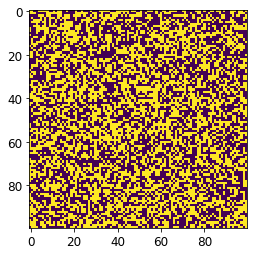

In [17]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.imshow(ising.lattice)

Notice that this implementation uses 0, 1 spins instead of -1, 1 as we are used to! To run the simulation, we call the `.SweepMetropolis()` method. If you go to the source file at `SethnasBookCode/Ising.py`, you can inspect all the code. You will notice that all `.Sweep...()` methods perform $N^2$ updates per time-step. This is useful because time-scales become independent of system size.

In [18]:
ising.SweepMetropolis(nTimes=100)

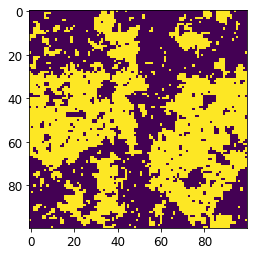

In [19]:
plt.imshow(ising.lattice)

The cell bellow will display 3 systems side-by-side, running at different temperatures. All parameters are set at the top. Try changing some values and see what happens.

In [20]:
#################
# set parameters
system_size = 100
H = 0.0
T_below = 1.5
T_critical = 2.269185314213022
T_above = 3.5
n_sweeps = 100
###############

# create three instances of IsingModel
ising_below = IsingModel(N=system_size, T=T_below, H=H)
ising_critical = IsingModel(N=system_size, T=T_critical, H=H)
ising_above = IsingModel(N=system_size, T=T_above, H=H)

# give them names
isings = [ising_below, ising_critical, ising_above]
labels = ["below $T_c$", "at $T_c$", "above $T_c$"]

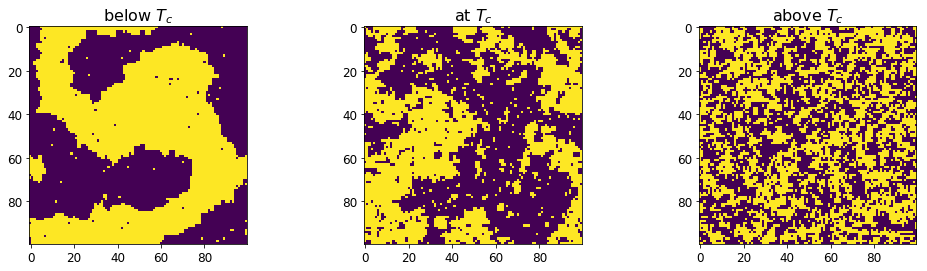

In [21]:
fig, axx = plt.subplots(1, 3, figsize=(17,4))
heatmap = {}
for ax, ising, label in zip(axx, isings, labels):
    heatmap[label] = ax.imshow(ising.lattice)
    ax.set_title(label, fontsize=16)

for _ in range(n_sweeps):
    for ax, ising, label in zip(axx, isings, labels):
        ising.SweepMetropolis(nTimes=1)
        heatmap[label].set_data(ising.lattice)
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Exercice
How much faster is Sethna's implementation with respect to ours? Use the cell magic `%%timeit` to measure how long a command takes to execute:

In [22]:
%%timeit
# your Ising implementation running for some number of updates

N=100
config = create_initial_config(N=N)
for _ in range(100*N*N):
    metropolis_single_update(config, T=T_c)

3min 7s ± 4.26 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
# Sethan's implementation running for some **equivalent** number of updates
ising = IsingModel(N=100)
ising.SweepMetropolis(nTimes=100)

39.5 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


L'algoritmo del Sethna è 180/39 = circa 5 volte più veloce 

## Magnetization
We will now compute the magnetization $M$ as a function of the temperature $T$. To speed up simulations even more, we will use the Wolff algorithm, which Sethna's code already implements in the `.SweepWolff()` method.

### Exercise
For a system of size $N=100$, approximately how many sweeps of the Wolff algorithm are necessary in practice to be in equilibrium? Try starting with smaller values of $N$, and increase gradually. 

In [75]:
# set system size, temperature
N = 20
ising = IsingModel(N=N, T=2)
# run some Wolff sweeps, check if equilibrium
for x in range(30):
    ising.SweepWolff()#flippa i cluster con stessi valori dello spin
    print(x, np.mean(ising.lattice*2-1))

0 -0.615
1 -0.8
2 -0.93
3 -0.87
4 -0.86
5 -0.87
6 -0.94
7 -0.91
8 -0.905
9 -0.945
10 -0.85
11 -0.695
12 -0.89
13 -0.84
14 -0.92
15 -0.85
16 -0.835
17 -0.855
18 -0.865
19 -0.96
20 -0.92
21 -0.97
22 -0.89
23 -0.95
24 -0.975
25 -0.93
26 -0.89
27 -0.875
28 -0.94
29 -0.84


In [76]:
# set system size, temperature
N = 50
ising = IsingModel(N=N, T=2)
# run some Wolff sweeps, check if equilibrium
for x in range(30):
    ising.SweepWolff()
    print(x, np.mean(ising.lattice*2-1))

0 -0.436
1 -0.6928
2 -0.896
3 -0.9216
4 -0.9336
5 -0.944
6 -0.9192
7 -0.9072
8 -0.9064
9 -0.9424
10 -0.9032
11 -0.884
12 -0.86
13 -0.8856
14 -0.9216
15 -0.9304
16 -0.9264
17 -0.9072
18 -0.896
19 -0.8848
20 -0.9184
21 -0.9264
22 -0.9384
23 -0.8784
24 -0.8928
25 -0.9024
26 -0.9344
27 -0.9312
28 -0.936
29 -0.8904


In [39]:
# set system size, temperature
N = 100
ising = IsingModel(N=N, T=2)
# run some Wolff sweeps, check if equilibrium
for x in range(30):
    ising.SweepWolff()
    print(x, np.mean(ising.lattice*2-1))

0 0.2376
1 0.4674
2 0.6418
3 0.6968
4 0.8086
5 0.8626
6 0.9224
7 0.9064
8 0.9086
9 0.8972
10 0.9118
11 0.9084
12 0.9058
13 0.9152
14 0.9156
15 0.9122
16 0.9092
17 0.9216
18 0.9182
19 0.9142
20 0.9188
21 0.9078
22 0.9128
23 0.9032
24 0.9188
25 0.9196
26 0.9092
27 0.908
28 0.9102
29 0.914


Per un sistema con con dimensione N grande, ad esempio 100, raggiungo l'equilibrio con un numero di iterazioni dell'algoritmo di Wolff di circa 10, con dimensioni minori l'equilibrio viene raggiunto più lentamente, quindi con interazioni maggiori dell'algoritmo.

### Exercise
Write a function that computes the magnetization of a 2D Ising system after certain equilibration period.

In [24]:
def calculate_magnetization(system_size=None, temperature=None, equilibration_time=None):
    """
    Calculate the magnetization of a 2D Ising model.
    
    Parameters
    ----------
    system_size : int
        The lattice size.
    temperature : float
        The simulation temperature.
    equilibration_time : int
        Number of Wolff sweeps before measuring M.
        
    """
    # instantiate model
    ising = IsingModel(N=system_size, T=temperature, seed=np.random.randint(1000))
    # equilibrate
    ising.SweepWolff(nTimes=equilibration_time)
    # compute magnetization
    config = ising.lattice*2-1 #traslo per avere una configurzione di 1 e -1
    m = config.mean()
    
    return m


### Exercise
+ Compute the magnetization for a system of size $N=64$, for diverent values of $T\in[1.5, 3.5]$.
+ Remember to choose wisely the equilibration time!
+ Plot $|M|$ as a function of $T$, and mark the critical temperature in your plot using the `plt.axvline()` function.

In [25]:
# define range of temperatures
temperatures = np.linspace(1.5, 3.5, num=100)
# system size
system_size = 64
# equilibration time
equilibration_time = 40

# loop over temperatures, compute magnetizations
magnetizations = []
for temperature in temperatures:
    magnetization = calculate_magnetization(system_size=system_size,
                                  temperature=temperature,
                                  equilibration_time=equilibration_time, 
                                 )
    magnetizations.append(magnetization)

Text(0,0.5,'Magnetizzazione $|M|$')

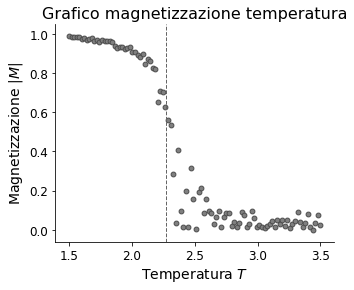

In [26]:
# define critical temperature
T_c = 2/np.log(1+np.sqrt(2))

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(
    temperatures, np.abs(magnetizations),
    # style keywords
    edgecolors="0.3", color="0.5", s=23)
ax.axvline(
    T_c,
    # style keywords
    c="0.4", lw=1, ls="dashed")
ax.set_title("Grafico magnetizzazione temperatura")
ax.set_xlabel("Temperatura $T$")
ax.set_ylabel("Magnetizzazione $|M|$")

## Susceptibility and Specific Heat


In this exercice, we will compute the susceptibility $\chi$ and the specific heat $C$. Using formula (6.13) in the book, we have that
$$
C = \frac{1}{T^2} \left\langle (E - \langle E \rangle)^2 \right\rangle.
$$
Remember that this is only valid in **equilibrium**, which means that we can only measure energy fluctuations **after a transient** equilibration time.

### Exercise
Find a convenient formula to measure the susceptibility $\chi$ in a simulation.

Una formula conveniente per calcolare la suscettibilità è:  
$$
\chi = \left\langle (M - \langle M \rangle)^2 \right\rangle \frac{1}{T}.
$$

### Exercise
Write a function that computes the energy of an Ising configuration

In [44]:
def compute_energy(ising):
    config = ising.lattice*2-1
    N = len(config)
    edges = [(i, j, (i+1)%N, j) for i in range(N) for j in range(N) ]\
              + [(i, j, i, (j+1)%N) for i in range(N) for j in range(N) ]
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1]*config[i2, j2]
    return E/N**2

### Exercise
Write a function that computes the susceptibility and the specific heat of a 2D Ising system. You might use the Wolff algorithm to speed up your simulations.

In [45]:
def calculate_susceptibility_specific_heat(system_size=None, temperature=None, equilibration_time=None, n_samples=None):
    """
    Simulate a 2D Ising model and measure its
    specific heat and susceptibility at equilibrium.
    
    Parameters
    ----------
    system_size : int
        The lattice side length.
    temperature :  float.
        The simulation temeperature.
    equilibration_time : int
        A transient period to allow for thermalization.
    n_samples : int
        The number of samples taken to compute fluctuations.

    """
    # initiate model
    ising = IsingModel(N=system_size, T=temperature)
    # thermalize (hopefully!)
    ising.SweepWolff(nTimes=equilibration_time)
    
    # create empty lists for magnetizations, energies, and their squares
    ms = []
    m2s = []
    es = []
    e2s = []
    
    # loop over n_samples 
    for _ in range(n_samples):
        # change from 0,1 to -1,1 notation
        config = ising.lattice*2-1
        # get magnetization
        m = np.abs(config.mean()); m2 = m**2
        ms.append(m); m2s.append(m**2)
        # get energy
        e = compute_energy(ising); e2 = e**2
        es.append(e); e2s.append(e**2)
        # update system
        ising.SweepWolff()
    
    # compute susceptibility and specific heat
    susceptibility = 1/temperature*(np.mean(m2s)-np.mean(ms)**2)
    specific_heat = 1/temperature**2*(np.mean(e2s)-np.mean(es)**2)
    
    return susceptibility, specific_heat

### Exercise
+ Compute $C$ and $\chi$ at different temperatures, for a small system of size $N<50$. You will need to find what are the right equilibration times. A good range of temperatures is $T \in [1.5, 3.5]$.
+ Make two plots, showing $\chi$ and $C$ as a function of $T$. Mark the critical temperature $T_c$ with a vertical line using `ax.axvline(...)`.

In [46]:
# define range of temperatures: 50 points from 1.5 to 4.
temperatures = np.linspace(1.5, 3.5, num=50)
# system size
system_size = 32
# equilibration time
equilibration_time = 100
# n_samples
n_samples = 20

# loop over temperatures, compute susceptibility and specific_heat
susceptibilities = []
specific_heats = []
for temperature in temperatures:
    susceptibility, specific_heat = calculate_susceptibility_specific_heat(system_size=system_size, temperature=temperature,
                                                                            equilibration_time=equilibration_time, n_samples=n_samples,
                                                                          )
                                                                                                                                                    
                                                                           
    susceptibilities.append(susceptibility)
    specific_heats.append(specific_heat)

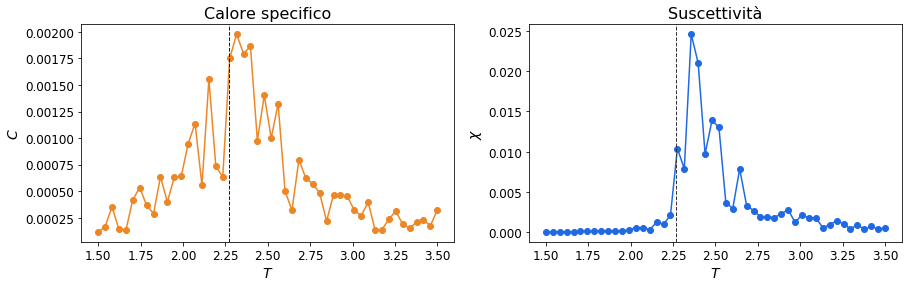

In [74]:
plt.subplot(121)
plt.plot(temperatures, specific_heats, "o-", color="#ed8625")
plt.axvline(2.269185314213022, color="0.1", lw=1, ls="dashed")
plt.ylabel("$C$")
plt.xlabel("$T$")
plt.title("Calore specifico");


plt.subplot(122)
plt.plot(temperatures, susceptibilities, "o-", color="#1f6ae2")
plt.axvline(2.269185314213022, color="0.2", lw=1, ls="dashed")
plt.ylabel("$\chi$")
plt.xlabel("$T$")
plt.title("Suscettività")

plt.subplots_adjust(left=0.10, right=2)


### Exercise
Discuss whether or not your results proof the existence of a phase transition.

I risultati trovati provano l'esistenza di una 
transizione di fase perché alla temperatura critica il sistema subisce un brusco cambiamento sia del calore specifico che della suscettività.